In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [128]:
df=pd.read_csv('E:\pict\sem6\dsbdal\datasets\cencusadult.csv',na_values='?' )

In [129]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [130]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [132]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [133]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [134]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [135]:
df=df.fillna({'workclass':'Private','native.country':'United-States'}, )

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [137]:
df.dropna(subset=['occupation'], inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30718 non-null  int64 
 1   workclass       30718 non-null  object
 2   fnlwgt          30718 non-null  int64 
 3   education       30718 non-null  object
 4   education.num   30718 non-null  int64 
 5   marital.status  30718 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    30718 non-null  object
 8   race            30718 non-null  object
 9   sex             30718 non-null  object
 10  capital.gain    30718 non-null  int64 
 11  capital.loss    30718 non-null  int64 
 12  hours.per.week  30718 non-null  int64 
 13  native.country  30718 non-null  object
 14  income          30718 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [139]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [140]:
le = LabelEncoder()

wo=le.fit_transform(df['workclass'])
ma=le.fit_transform(df['marital.status'])
oc=le.fit_transform(df['occupation'])
re=le.fit_transform(df['relationship'])
ra=le.fit_transform(df['race'])
se=le.fit_transform(df['sex'])
na=le.fit_transform(df['native.country'])
inc=le.fit_transform(df['income'])

In [141]:
df.drop(columns=['workclass','marital.status','occupation','relationship','race','sex','native.country','income'], axis=1, inplace=True)

In [142]:
df

,age,fnlwgt,education,education.num,capital.gain,capital.loss,hours.per.week
1,82,132870,HS-grad,9,0,4356,18
3,54,140359,7th-8th,4,0,3900,40
4,41,264663,Some-college,10,0,3900,40
5,34,216864,HS-grad,9,0,3770,45
6,38,150601,10th,6,0,3770,40
...,...,...,...,...,...,...,...
32556,22,310152,Some-college,10,0,0,40
32557,27,257302,Assoc-acdm,12,0,0,38
32558,40,154374,HS-grad,9,0,0,40
32559,58,151910,HS-grad,9,0,0,40


In [143]:
df['workclass']=wo
df['marital.status']=ma
df['occupation']=oc
df['relationship']=re
df['race']=ra
df['sex']=se
df['native.country']=na
df['income']=inc

In [144]:
df

,age,fnlwgt,education,education.num,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,HS-grad,9,0,4356,18,2,6,3,1,4,0,38,0
3,54,140359,7th-8th,4,0,3900,40,2,0,6,4,4,0,38,0
4,41,264663,Some-college,10,0,3900,40,2,5,9,3,4,0,38,0
5,34,216864,HS-grad,9,0,3770,45,2,0,7,4,4,0,38,0
6,38,150601,10th,6,0,3770,40,2,5,0,4,4,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,Some-college,10,0,0,40,2,4,10,1,4,1,38,0
32557,27,257302,Assoc-acdm,12,0,0,38,2,2,12,5,4,0,38,0
32558,40,154374,HS-grad,9,0,0,40,2,2,6,0,4,1,38,1
32559,58,151910,HS-grad,9,0,0,40,2,6,0,4,4,0,38,0


In [145]:
df.drop(columns=['education', 'fnlwgt'], axis=1, inplace=True)

In [146]:
df

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country,income
1,82,9,0,4356,18,2,6,3,1,4,0,38,0
3,54,4,0,3900,40,2,0,6,4,4,0,38,0
4,41,10,0,3900,40,2,5,9,3,4,0,38,0
5,34,9,0,3770,45,2,0,7,4,4,0,38,0
6,38,6,0,3770,40,2,5,0,4,4,1,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,10,0,0,40,2,4,10,1,4,1,38,0
32557,27,12,0,0,38,2,2,12,5,4,0,38,0
32558,40,9,0,0,40,2,2,6,0,4,1,38,1
32559,58,9,0,0,40,2,6,0,4,4,0,38,0


In [147]:
arr1=df.columns

In [148]:
arr2=['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass', 'race', 'native.country', 'income']

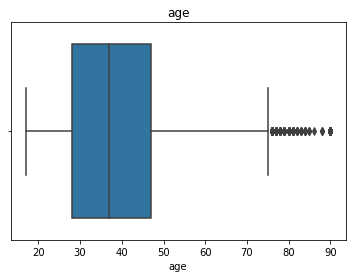

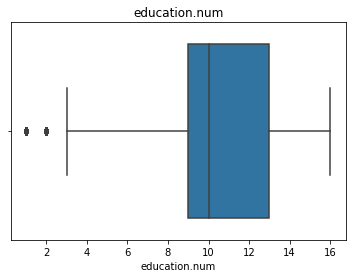

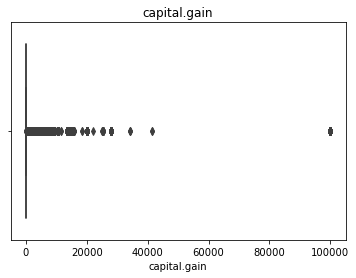

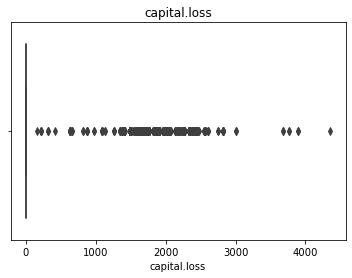

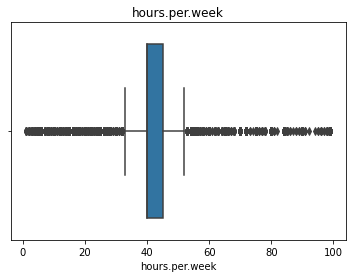

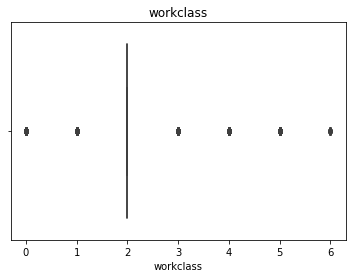

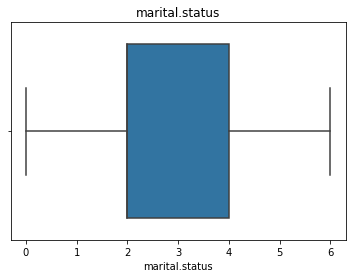

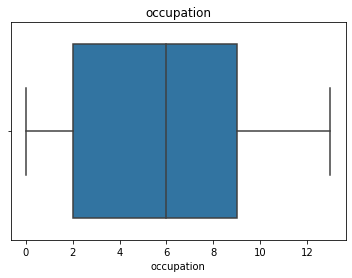

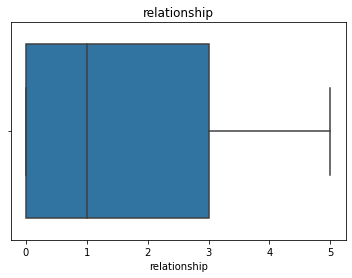

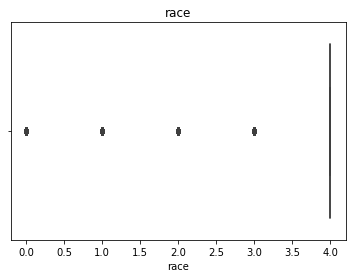

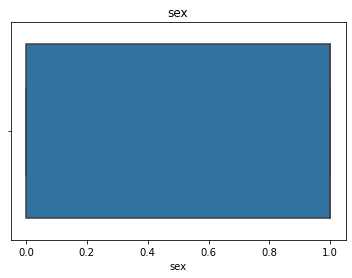

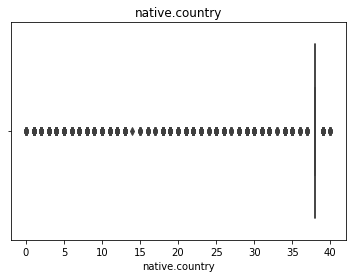

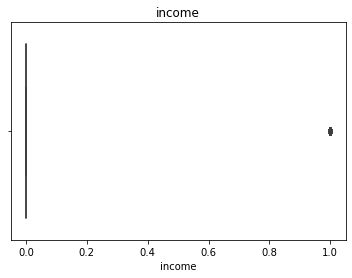

In [149]:
i = range(13)
for x in i:
    sns.boxplot(x=df[arr1[x]], whis=1.5)
    plt.title(arr1[x])
    plt.show()

In [150]:
def outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr=q3-q1
    upper_bound= q3 + iqr*1.5
    lower_bound= q1 - iqr*1.5
    li = df.index[(df[col]<lower_bound) | ( df[col]>upper_bound) ]
    return li

In [151]:
il=[]
for f in arr2:
    il.extend(outliers(df,f))

In [155]:
il

TypeError: count() takes exactly one argument (0 given)

In [156]:
df1=df.drop(il)
df1

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass,marital.status,occupation,relationship,race,sex,native.country,income
4232,38,9,0,0,40,2,0,5,1,4,1,38,0
4235,37,14,0,0,40,2,2,3,5,4,0,38,0
4245,32,9,0,0,40,2,4,6,4,4,1,38,0
4246,38,7,0,0,50,2,2,11,0,4,1,38,0
4251,59,9,0,0,40,2,0,12,4,4,0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32548,37,12,0,0,40,2,0,12,1,4,0,38,0
32553,43,11,0,0,45,2,2,11,0,4,1,38,0
32556,22,10,0,0,40,2,4,10,1,4,1,38,0
32557,27,12,0,0,38,2,2,12,5,4,0,38,0


In [157]:
df1.columns

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [160]:
features = ['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'workclass', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country']
target = ['income']
X = df1[features]
y = df1[target]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6864, 12), (2289, 12), (6864, 1), (2289, 1))

In [169]:
X1_train = X_train 
y1_train = y_train 

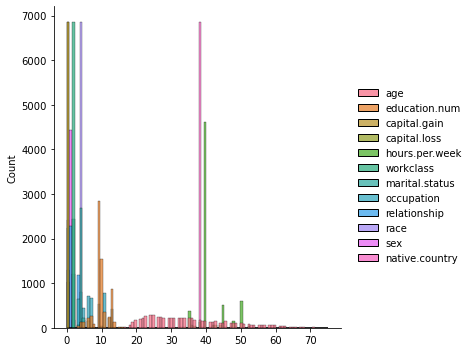

In [162]:
sns.displot(X_train)

In [163]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [164]:
y_pred = lr.predict(X_test)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [165]:
mean_squared_error(y_test, y_pred)

0.0

In [166]:
mean_absolute_error(y_test, y_pred)

0.0

In [167]:
r2_score(y_test, y_pred)

1.0

In [170]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X1_train,np.ravel(y1_train))

GaussianNB()

In [171]:
y1_pred = nb.predict(X_test)
y1_pred

array([0, 0, 0, ..., 0, 0, 0])

In [172]:
mean_squared_error(y_test, y1_pred)

0.0

In [173]:
mean_absolute_error(y_test, y1_pred)

0.0

In [174]:
r2_score(y_test, y1_pred)

1.0